CSCI 5636 Homework 1
Luke Meszar
9/16/2018


The first derivative for a uniform grid uses the central differencing scheme on the interior and the following endpoint rule
$$f'(x_i) = \frac{1}{2h}[-3f(x_i) + 4f(x_i + h) - f(x_0 + 2h)]$$ found in Burden and Faire's Numerical Analysis textbook.

For the non-uniform grid, the same method is used for both the interior and boundary points except that the variances in $h_i$ have been taken into account.

In [104]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from random import uniform

plt.style.use('ggplot')

def diffmat(n, h):
    D = np.zeros((n,n))
    D[0,0] = -3
    D[0,1] = 4
    D[0,2] = -1
    D[n-1,-3] = 1
    D[n-1,-2] = -4
    D[n-1,-1] = 3
    for i in range(1,n-1):
        D[i,i-1] = -1
        D[i,i+1] = 1
    return (1/(2*h))*D

def diffmat_uneven(n,x):
    D = np.zeros((n,n))
    D[0,0] = (2*x[0] - x[1] - x[2])/((x[0] - x[1])*(x[0] - x[2]))
    D[0,1] = (x[0]  - x[2])/((x[1] - x[0])*(x[1] - x[2]))
    D[0,2] = (x[0] - x[1])/((x[2] - x[0])*(x[2] - x[1]))
    D[n-1,-3] = (x[n-1] - x[n-2])/((x[n-3] - x[n-2])*(x[n-3] - x[n-1]))
    D[n-1,-2] = (x[n-1] - x[n-3])/((x[n-2] - x[n-1])*(x[n-2] - x[n-3]))
    D[n-1,-1] = (2*x[n-1] - x[n-2] - x[n-3])/((x[n-1] - x[n-3])*(x[n-1] - x[n-2]))
    for i in range(1,n-1):
        h_i = x[i+1] - x[i-1]
        D[i,i-1] = -1/h_i
        D[i,i+1] = 1/h_i
    return D

The endpoint formula for the second derivative for uniform grid is based on the forward differencing method from https://www.geometrictools.com/Documentation/FiniteDifferences.pdf. The interior derivates are calculated using the staggered point method. 

The formula for a non-uniform grid is taken from here https://mathformeremortals.wordpress.com/2013/01/12/a-numerical-second-derivative-from-three-points/.  

In [41]:
def diff2mat(n,h):
    D = np.zeros((n,n))
    D[0,0] = 1
    D[0,1] = -2
    D[0,2] = 1
    D[n-1,-3] = 1
    D[n-1,-2] = -2
    D[n-1,-1] = 1
    for i in range(1,n-1):
        D[i,i-1] = 1
        D[i,i] = -2
        D[i,i+1] = 1
    return (1/h**2)*D


def diff2mat_uneven(n,x):
    D = np.zeros((n,n))
    D[0,0] = 2/((x[1] - x[0])*(x[2] - x[0]))
    D[0,1] = -2/((x[2] - x[1])*(x[1] - x[0]))
    D[0,2] = 2/((x[2] - x[1])*(x[2] - x[0]))
    D[n-1,-3] = 2/((x[-2] - x[-3])*(x[-1] - x[-3]))
    D[n-1,-2] = -2/((x[-1] - x[-2])*(x[-2] - x[-3]))
    D[n-1,-1] = 2/((x[-1] - x[-2])*(x[-1] - x[-3]))
    for i in range(1,n-1):
        D[i,i-1] = 2/((x[i] - x[i-1])*(x[i+1] - x[i-1]))
        D[i,i] = -2/((x[i+1] - x[i])*(x[i] - x[i-1]))
        D[i,i+1] = 2/((x[i+1] - x[i])*(x[i+1] - x[i-1]))
    return D

In [125]:
def plot_exact_vs_numerical(x, numerical_derivative, exact_derivative, derivative_name, derivative_order, uniform=True):
    plt.plot(x,numerical_derivative,'o')
    plt.title(derivative_order + " derivative of " + derivative_name + " with " + str(len(x)) + " points" + ". Uniform grid: " + str(uniform))
    plt.plot(x,exact_derivative)

In [43]:
def test_first_derivative(f, fp, n, domain):
    x = np.linspace(domain[0], domain[1], n)
    h = (domain[1] - domain[0])/(n-1)
    u = f(x)
    D = diffmat(n,h)
    up = np.matmul(D,u)
    fpx = fp(x)
    return x, up, fpx
    


I choose to create an uneven grid using a uniform displacement of $(-h/4, h/4)$ for the interior points and only $(0,h/4)$ and $(-h/4,0)$ for the left and right endpoints respectively. 

In [109]:
def test_first_derivative_uneven_grid(f, fp, n, domain):
    x = np.linspace(domain[0], domain[1], n)
    h = (domain[1] - domain[0])/(n-1)
    left_displacement = uniform(0,h/4)
    x[0] = x[0] + left_displacement
    for i in range(1,len(x)-1):
        displacement = uniform(-h/4,h/4)
        x[i] = x[i] + displacement
    right_displacement = uniform(-h/4,0)
    x[-1] = x[-1] + right_displacement
    u = f(x)
    D = diffmat_uneven(n,x)
    up = np.matmul(D,u)
    fpx = fp(x)
    return x, up, fpx

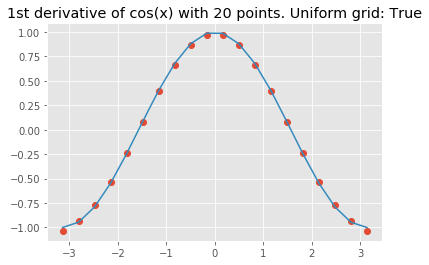

In [126]:
x, up, fpx = test_first_derivative(np.sin, np.cos, 20, (-np.pi,np.pi))
plot_exact_vs_numerical(x, up, fpx, "cos(x)", "1st")


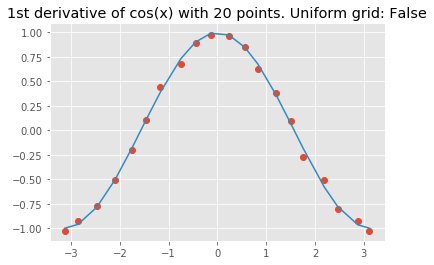

In [162]:
x, up, fpx = test_first_derivative_uneven_grid(np.sin, np.cos, 20, (-np.pi,np.pi))
plot_exact_vs_numerical(x, up, fpx, "cos(x)", "1st", False)

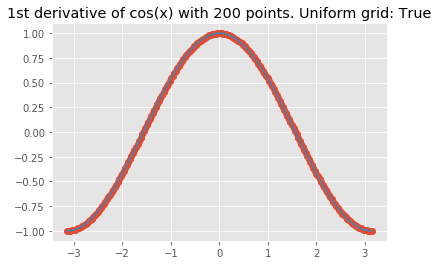

In [128]:
x, up, fpx = test_first_derivative(np.sin, np.cos, 200, (-np.pi,np.pi))
plot_exact_vs_numerical(x, up, fpx, "cos(x)", "1st")

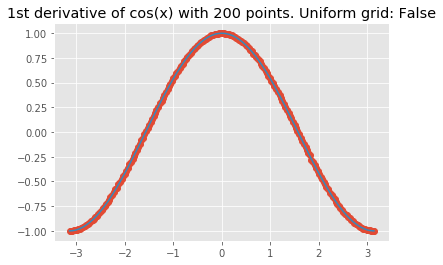

In [156]:
x, up, fpx = test_first_derivative_uneven_grid(np.sin, np.cos, 200, (-np.pi,np.pi))
plot_exact_vs_numerical(x, up, fpx, "cos(x)", "1st", False)

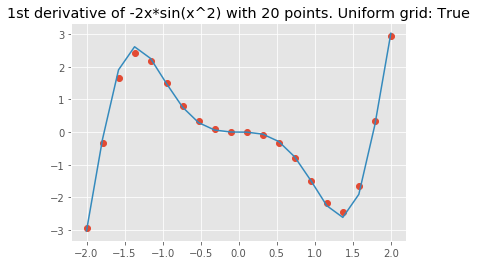

In [130]:
def func1(x):
    return np.cos(x**2)

def func1p(x):
    return -2*x*np.sin(x**2)

x, up, fpx = test_first_derivative(func1, func1p, 20, (-2,2))
plot_exact_vs_numerical(x, up, fpx, "-2x*sin(x^2)", "1st")

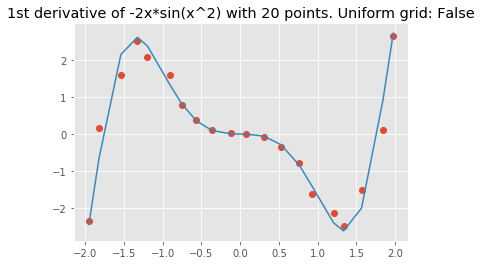

In [163]:
x, up, fpx = test_first_derivative_uneven_grid(func1, func1p, 20, (-2,2))
plot_exact_vs_numerical(x, up, fpx, "-2x*sin(x^2)", "1st", False)

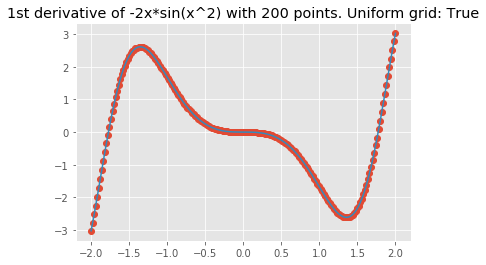

In [132]:
x, up, fpx = test_first_derivative(func1, func1p, 200, (-2,2))
plot_exact_vs_numerical(x, up, fpx, "-2x*sin(x^2)", "1st")

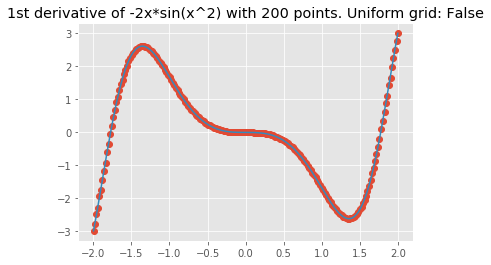

In [155]:
x, up, fpx = test_first_derivative_uneven_grid(func1, func1p, 200, (-2,2))
plot_exact_vs_numerical(x, up, fpx, "-2x*sin(x^2)", "1st", False)

In [184]:
def test_second_derivative(f, fpp, n, domain):
    x = np.linspace(domain[0], domain[1], n)
    h = (domain[1] - domain[0])/(n-1)
    u = f(x)
    D = diff2mat(n,h)
    upp = np.matmul(D,u)
    fppx = fpp(x)
    return x, upp, fppx

def test_second_derivative_uneven_grid(f, fpp, n, domain):
    x = np.linspace(domain[0], domain[1], n)
    h = (domain[1] - domain[0])/(n-1)
    left_displacement = uniform(0,h/4)
    x[0] = x[0] + left_displacement
    for i in range(1,len(x)-1):
        displacement = uniform(-h/4,h/4)
        x[i] = x[i] + displacement
    right_displacement = uniform(-h/4,0)
    x[-1] = x[-1] + right_displacement
    u = f(x)
    D = diff2mat_uneven(n,x)
    upp = np.matmul(D,u)
    fppx = fpp(x)
    return x, upp, fppx

In [54]:
def func2(x):
    return np.sin(x)

def func2pp(x):
    return -np.sin(x)

def func3(x):
    return np.tanh(x)

def func3pp(x):
    return -2*np.tanh(x)*(np.cosh(x)**(-2))

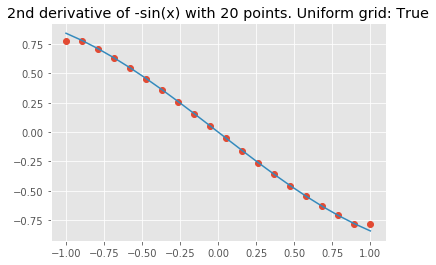

In [135]:
x, upp, fppx = test_second_derivative(func2, func2pp, 20, (-1,1))
plot_exact_vs_numerical(x, upp, fppx, "-sin(x)", "2nd")

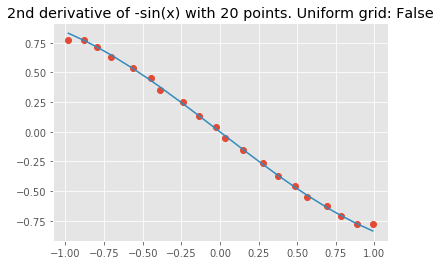

In [138]:
x, upp, fppx = test_second_derivative_uneven_grid(func2, func2pp, 20, (-1,1))
plot_exact_vs_numerical(x, upp, fppx, "-sin(x)", "2nd", False)

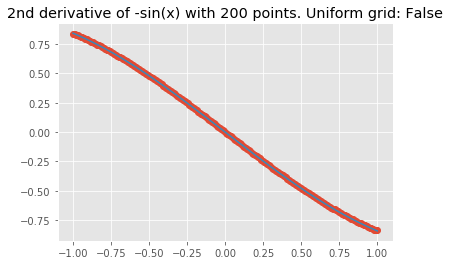

In [141]:
x, upp, fppx = test_second_derivative(func2, func2pp, 200, (-1,1))
plot_exact_vs_numerical(x, upp, fppx, "-sin(x)", "2nd", False)

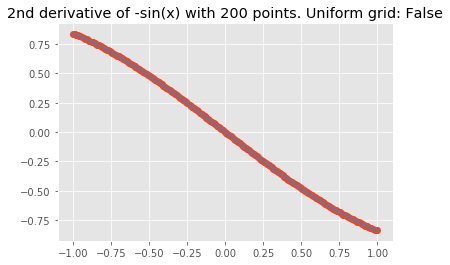

In [139]:
x, upp, fppx = test_second_derivative_uneven_grid(func2, func2pp, 200, (-1,1))
plot_exact_vs_numerical(x, upp, fppx, "-sin(x)", "2nd", False)

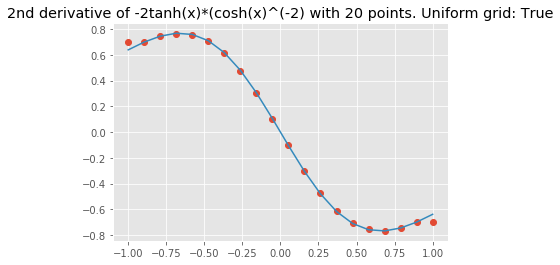

In [142]:
x, upp, fppx = test_second_derivative(func3, func3pp, 20, (-1,1))
plot_exact_vs_numerical(x, upp, fppx, "-2tanh(x)*(cosh(x)^(-2)", "2nd")

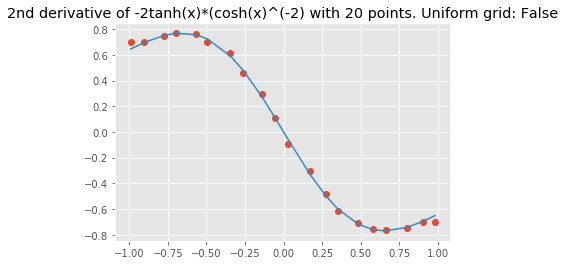

In [145]:
x, upp, fppx = test_second_derivative_uneven_grid(func3, func3pp, 20, (-1,1))
plot_exact_vs_numerical(x, upp, fppx, "-2tanh(x)*(cosh(x)^(-2)", "2nd", False)

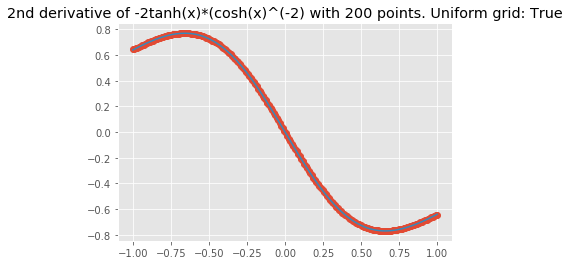

In [143]:
x, upp, fppx = test_second_derivative(func3, func3pp, 200, (-1,1))
plot_exact_vs_numerical(x, upp, fppx, "-2tanh(x)*(cosh(x)^(-2)", "2nd")

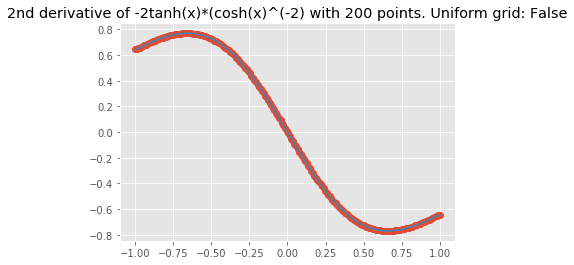

In [144]:
x, upp, fppx = test_second_derivative_uneven_grid(func3, func3pp, 200, (-1,1))
plot_exact_vs_numerical(x, upp, fppx, "-2tanh(x)*(cosh(x)^(-2)", "2nd", False)

This grid refinement code is more or less copied from the finite difference notebook. 

In [91]:
def grid_refinement_error(diff, domain, f, derivative_of_f, norm):
    grids = 2**np.arange(3,10)
    error = []
    for n in grids:
        xx, yy, _ = diff(f, derivative_of_f, n, domain)
        error.append(np.linalg.norm(yy-derivative_of_f(xx), norm))
    return grids, error
def uneven_grid_refinement_error(diff, domain, f, derivative_of_f, norm):
    grids = 2**np.arange(3,10)
    error = []
    for n in grids:
        x = np.linspace(domain[0], domain[1], n)
        x = np.linspace(domain[0], domain[1], n)
        h = (domain[1] - domain[0])/(n-1)
        left_displacement = uniform(0,h/4)
        x[0] = x[0] + left_displacement
        for i in range(1,len(x)-1):
            displacement = uniform(-h/4,h/4)
            x[i] = x[i] + displacement
        right_displacement = uniform(-h/4,0)
        x[-1] = x[-1] + right_displacement
        xx, yy, _ = diff(f, derivative_of_f, n, domain)
        error.append(np.linalg.norm(yy-derivative_of_f(xx), norm))
    return grids, error


For all the tests I ran, I chose to use the $L_\infty$ norm. I tried some of the others, but the results weren't any more interesting so I chose to stick with the $L_\infty$ norm. 

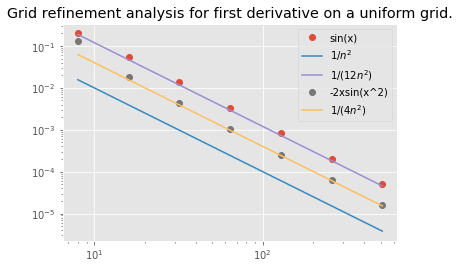

In [164]:
grids, error = grid_refinement_error(test_first_derivative, (-np.pi,np.pi), np.sin,np.cos, np.inf)
plt.loglog(grids, error, 'o',label='sin(x)')
plt.loglog(grids, grids**(-2.), label='$1/n^2$')
plt.loglog(grids, 12*grids**(-2.), label='$1/(12n^2)$')
grids, error = grid_refinement_error(test_first_derivative, (-1,1), func1, func1p, np.inf)
plt.loglog(grids, error, 'o', label='-2xsin(x^2)')
plt.loglog(grids, 4*grids**(-2.), label='$1/(4n^2)$')
plt.title("Grid refinement analysis for first derivative on a uniform grid.")
plt.legend(loc='upper right');

Here we see that the first derivative method for both test functions is a second-order method. It's interesting that the exact constants are not the same for both test functions. The constants are different because the error depends on each of their third derivatives which are different.

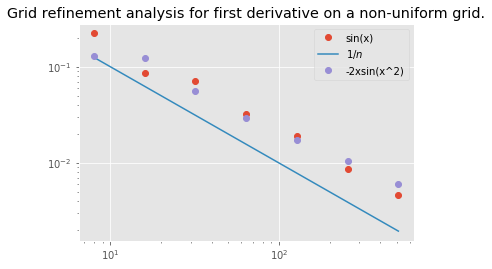

In [173]:
grids, error = uneven_grid_refinement_error(test_first_derivative_uneven_grid, (-np.pi,np.pi), np.sin,np.cos, np.inf)
plt.loglog(grids, error, 'o',label='sin(x)')
plt.loglog(grids, grids**(-1.), label='$1/n$')
grids, error = uneven_grid_refinement_error(test_first_derivative_uneven_grid, (-1,1), func1, func1p, np.inf)
plt.loglog(grids, error, 'o', label='-2xsin(x^2)')
plt.title("Grid refinement analysis for first derivative on a non-uniform grid.")
plt.legend(loc='upper right');

When we switch to an uneven grid, the accuracy decreases to only first order. In this case, both functions's errors are around the same values. 

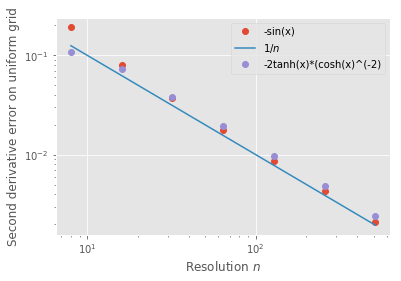

In [185]:
grids, error = grid_refinement_error(test_second_derivative, (-1,1), func2, func2pp, np.inf)
plt.loglog(grids, error, 'o', label="-sin(x)")
plt.loglog(grids, grids**(-1.), label='$1/n$')
plt.legend(loc='upper right');
grids, error = grid_refinement_error(test_second_derivative, (-1,1), func3, func3pp,np.inf)
plt.loglog(grids, error, 'o', label="-2tanh(x)*(cosh(x)^(-2)")
plt.xlabel('Resolution $n$')
plt.ylabel('Second derivative error on uniform grid')
plt.legend(loc='upper right');

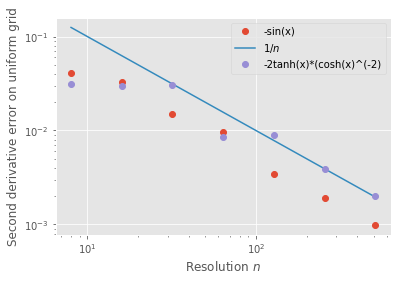

In [180]:
grids, error = uneven_grid_refinement_error(test_second_derivative_uneven_grid, (-1,1), func2, func2pp, np.inf)
plt.loglog(grids, error, 'o', label="-sin(x)")
plt.loglog(grids, grids**(-1.), label='$1/n$')
plt.legend(loc='upper right');
grids, error = uneven_grid_refinement_error(test_second_derivative_uneven_grid, (-1,1), func3, func3pp,np.inf)
plt.loglog(grids, error, 'o', label="-2tanh(x)*(cosh(x)^(-2)")
plt.xlabel('Resolution $n$')
plt.ylabel('Second derivative error on uniform grid')
plt.legend(loc='upper right');

In both grid refinement test for the second derivate (i.e., uniform and non uniform), we see that the the method has first order accuracy. It's interesting because the uniform method has second order accuracy on the interior but only first order accuracy on the boundary points which brings the order of accuracy down across the whole domain. 